<a href="https://colab.research.google.com/github/Tanishqk96/Agentic-ai/blob/main/confusion_and_imbalanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
dataset = pd.read_csv('/content/cgpa_placement_salary.csv')
print(dataset)
dataset['Placed'] = dataset['Placed'].replace({'Yes': 1, 'No': 0})

   CGPA Placed  Salary_LPA
0   6.5     No         0.0
1   7.0     No         0.0
2   7.2     No         0.0
3   7.5    Yes         3.0
4   8.0    Yes         4.5
5   8.2    Yes         5.0
6   8.5    Yes         6.5
7   9.0    Yes         7.2
8   9.2    Yes         8.0
9   9.5    Yes        10.0


<ipython-input-25-2136719290>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Placed'] = dataset['Placed'].replace({'Yes': 1, 'No': 0})


In [26]:
x= dataset.iloc[:,:-1]
y= dataset["Placed"]

x

,CGPA,Placed
0,6.5,0
1,7.0,0
2,7.2,0
3,7.5,1
4,8.0,1
5,8.2,1
6,8.5,1
7,9.0,1
8,9.2,1
9,9.5,1


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [28]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [30]:
lr.score(x_test, y_test)*100

100.0

In [19]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score

In [32]:
recall_score(y_test, lr.predict(x_test))*100

100.0

In [33]:
precision_score(y_test, lr.predict(x_test))*100

100.0

In [34]:
f1_score(y_test, lr.predict(x_test))*100

100.0

In [37]:
cf= confusion_matrix(y_test, lr.predict(x_test))

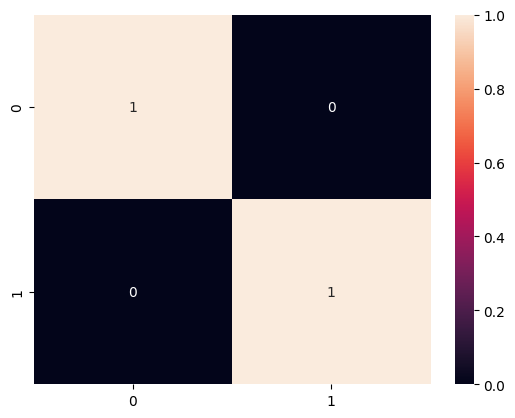

In [39]:
sns.heatmap(cf,annot=True)
plt.show()

In [40]:
!pip install imbalanced-learn


In [42]:
from sklearn.datasets import make_classification
import pandas as pd

# Fixed: specify the feature breakdown
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    weights=[0.9, 0.1],
    random_state=42
)

df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

print(df['Target'].value_counts())  # check imbalance


Target
0    894
1    106
Name: count, dtype: int64


***RANDOM OVER SAMPLING***

In [43]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(df[['Feature1', 'Feature2']], df['Target'])

print(pd.Series(y_over).value_counts())  # Balanced classes


Target
0    894
1    894
Name: count, dtype: int64


***RANDOM UNDER SAMPLING***

In [44]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(df[['Feature1', 'Feature2']], df['Target'])

print(pd.Series(y_under).value_counts())  # Balanced classes


Target
0    106
1    106
Name: count, dtype: int64
